# Interactive Dashboard with DASH 

### Import libraries

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

### Read the csv file

In [3]:
# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")

In [4]:
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

### Initiate the dash app

In [5]:
# Create a dash application
app = dash.Dash(__name__)

### App layout

In [6]:
# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                dcc.Dropdown(id='site-dropdown',
                                options=[{'label': i, 'value': i} for i in spacex_df['Launch Site'].unique()]+
                                [{'label':'ALL', 'value':'ALL'}],
                                value='ALL',
                                placeholder ='Select a Launch Site here',
                                searchable = True),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',min=0,max=10000,step=1000,value=[min_payload,max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])


In [7]:
# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value')
)
def create_fig(select_dropdown):
    if select_dropdown == 'ALL':
        filter_df = spacex_df [['Launch Site','class']].groupby('Launch Site').sum()
        filter_df.reset_index(inplace=True)
        fig=px.pie(filter_df, values='class', names='Launch Site')

    else:
        sub_df = spacex_df[spacex_df['Launch Site']==select_dropdown]
        filter_df =  pd.DataFrame(sub_df[['class']].value_counts() )
        filter_df.reset_index(inplace=True) 
        filter_df.columns=['class','count']
        fig=px.pie(filter_df, values='count', names='class')

    return fig

In [ ]:
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'), 
        Input(component_id="payload-slider", component_property="value")]
)

### Scatter plot function

In [9]:
def create_scatter(site, payload):
    print(payload)
    if site == 'ALL':
        filter_df = spacex_df[(spacex_df['Payload Mass (kg)']>=int(payload[0])) & (spacex_df['Payload Mass (kg)']<=int(payload[1]))]
        print(filter_df[['class','Payload Mass (kg)']])
        fig=px.scatter(filter_df,x='Payload Mass (kg)', y='class',color="Booster Version Category")

    else:
        filter_df = spacex_df[spacex_df['Launch Site']==select_dropdown]
        filter_df = filter_df[(filter_df['Payload Mass (kg)']>=int(payload[0])) & (filter_df['Payload Mass (kg)'] <=int(payload[1]))]
        print(filter_df[['class','Payload Mass (kg)']])
        fig=px.scatter(filter_df,x='Payload Mass (kg)', y='class',color="Booster Version Category")
    return fig

### Run the app
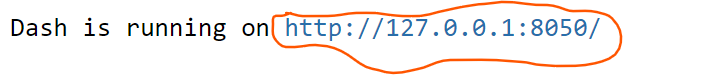

In [ ]:
# Run the app
if __name__ == '__main__':
    app.run_server()

**Click on the URL:** http://127.0.0.1:8050/ this is just an example dash will create yours 